## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


## Load the Dataset

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")

## 1. Data Cleaning and Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool


In [6]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']
print("Categorical columns:", cat_col)
print("Numerical columns:", num_col)

Categorical columns: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
Numerical columns: ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


#### Calculate Missing Values

In [7]:
print(df.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


#### Detect outliers using Boxplot

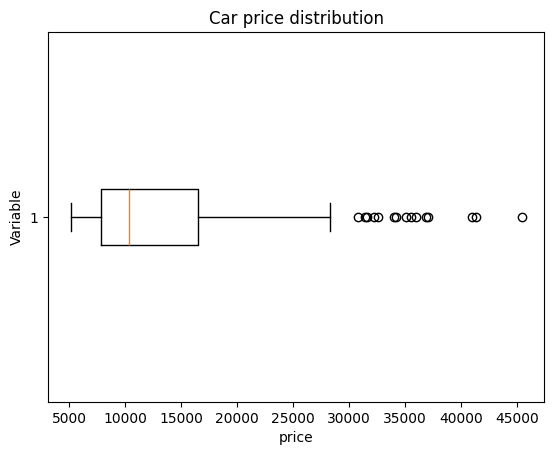

In [8]:
plt.boxplot(df['price'], vert=False)
plt.ylabel('Variable')
plt.xlabel('price')
plt.title('Car price distribution')
plt.show()


#### Calculate outliers boundaries and remove them

In [9]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound",lower_bound)
print("upper bound", upper_bound)


Lower bound -5284.5
upper bound 29575.5


In [10]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print("Number of Outliers:", len(outliers))

Number of Outliers: 15


#### Remove Outliers

In [11]:
df1 = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

#### Verify using boxplot again

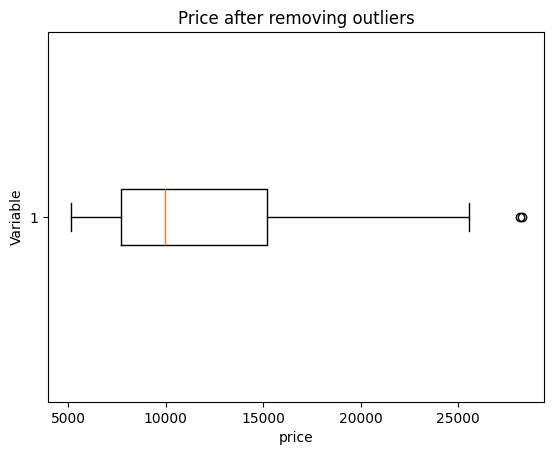

In [12]:
plt.boxplot(df1['price'], vert=False)
plt.title("Price after removing outliers")
plt.ylabel('Variable')
plt.xlabel('price')
plt.show()

##### After recalculation, a new extreme value appears.This is called iterative outlier detection."After applying the IQR method, most extreme price outliers were removed. A small number of mild outliers remain, which is acceptable as they represent genuine high-priced cars.”

#### Correlation Analysis

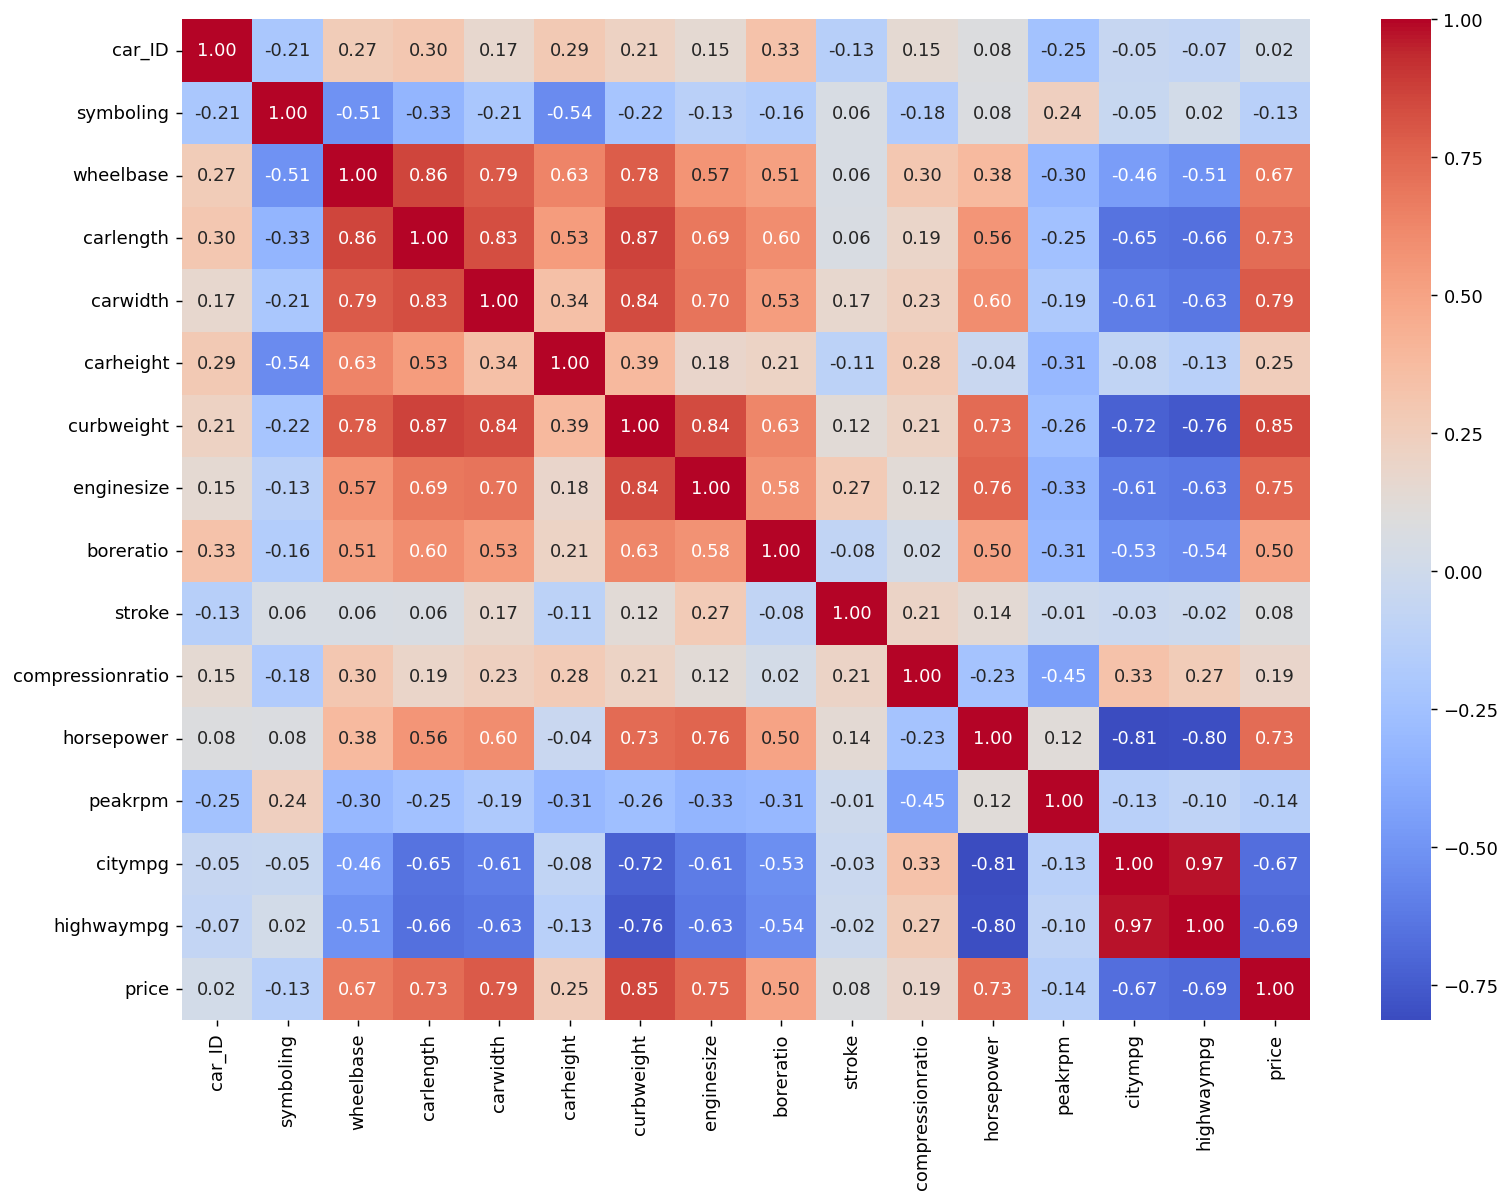

price               1.000000
curbweight          0.853951
carwidth            0.791890
enginesize          0.749883
carlength           0.729734
horsepower          0.727394
wheelbase           0.667712
boreratio           0.499244
carheight           0.254564
compressionratio    0.185007
stroke              0.079378
car_ID              0.020822
symboling          -0.128941
peakrpm            -0.136189
citympg            -0.670256
highwaympg         -0.686157
Name: price, dtype: float64


In [13]:
corr = df1.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(14,10),dpi=130)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

print(corr['price'].sort_values(ascending=False))

#### Separate features and target variable

In [14]:
X = df1.drop(columns=['price'])
y = df1['price']
print(X)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

#### Convert categorical columns → numbers (one-hot encoding)

In [15]:
X = pd.get_dummies(X, drop_first=True)

#### Feature scaling - Standardization

In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns=X.columns)
print(X_scaled.head())

     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0 -1.747836   1.763299  -1.837142  -0.353573 -0.834337  -2.048261    0.152836   
1 -1.731104   1.763299  -1.837142  -0.353573 -0.834337  -2.048261    0.152836   
2 -1.714373   0.132998  -0.716970  -0.142042 -0.073509  -0.560199    0.771208   
3 -1.697641   0.948149   0.289286   0.333904  0.306906   0.225167   -0.321625   
4 -1.680909   0.948149   0.213342   0.333904  0.415595   0.225167    0.773457   

   enginesize  boreratio    stroke  ...  cylindernumber_six  \
0    0.432512   0.637673 -1.883841  ...           -0.303239   
1    0.432512   0.637673 -1.883841  ...           -0.303239   
2    1.253912  -2.389360  0.721323  ...            3.297726   
3   -0.351551  -0.435199  0.490486  ...           -0.303239   
4    0.656530  -0.435199  0.490486  ...           -0.303239   

   cylindernumber_three  cylindernumber_two  fuelsystem_2bbl  fuelsystem_4bbl  \
0             -0.072739           -0.146647         -

#### TRAIN-TEST SPLIT


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Train-test split completed")

Train-test split completed


### Linear Regression

In [18]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear Regression model trained successfully")

Linear Regression model trained successfully


In [19]:
y_pred_lr = lr_model.predict(X_test)

#### model evaluation

In [20]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression R2 Score: {r2_lr}")

Linear Regression Performance:
Linear Regression MSE: 159208618.27837524
Linear Regression MAE: 9081.512259870824
Linear Regression R2 Score: -8.471327613578584


### DECISION TREE REGRESSOR IMPLEMENTATION

In [21]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
print("Decision Tree Regressor trained successfully")

Decision Tree Regressor trained successfully


#### MAKE PREDICTION ON TEST DATA

In [22]:
y_pred = dt_model.predict(X_test)

#### Model evaluation

In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Decision Tree Performance:")
print(f"Decision Tree MSE: {mse}")
print(f"Decision Tree R² Score: {r2}")
print(f"Decision Tree MAE: {mae}")

Decision Tree Performance:
Decision Tree MSE: 1360901.3127339212
Decision Tree R² Score: 0.9190399218205961
Decision Tree MAE: 829.6491315789474


### RANDOM FOREST REGRESSOR IMPLEMENTATION

In [24]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest model trained successfully")

Random Forest model trained successfully


#### MAKE PREDICTION ON TEST DATA

In [25]:
rf_pred = rf_model.predict(X_test)

#### Model evaluation

In [26]:
mse = mean_squared_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)
mae = mean_absolute_error(y_test, rf_pred)
print("Random Forest Performance:")
print(f"Random Forest MSE: {mse}")
print(f"Random Forest R² Score: {r2}")
print(f"Random Forest MAE: {mae}")

Random Forest Performance:
Random Forest MSE: 1434312.8719608944
Random Forest R² Score: 0.9146726649749487
Random Forest MAE: 842.1575789473684


### SUPPORT VECTOR REGRESSOR IMPLEMENTATION

In [27]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
print("SVR model trained successfully")

SVR model trained successfully


#### Make prediction on test data

In [28]:
svr_pred = svr_model.predict(X_test)

#### Model Evaluation

In [29]:
svr_mse = mean_squared_error(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)
print("SVR Performance:")
print(f"SVR MSE: {svr_mse}")
print(f"SVR R² Score: {svr_r2}")
print(f"SVR MAE: {svr_mae}")

SVR Performance:
SVR MSE: 17213564.484778628
SVR R² Score: -0.024035698543236172
SVR MAE: 3666.713556038406


### GRADIENT BOOSTING REGRESSOR IMPLEMENTATION

In [30]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
print("Gradient Boosting model trained successfully")

Gradient Boosting model trained successfully


#### make prediction on test data

In [31]:
gbr_pred = gbr.predict(X_test)

#### Model Evaluation

In [32]:
gbr_mse = mean_squared_error(y_test, gbr_pred)
gbr_mae = mean_absolute_error(y_test, gbr_pred)
gbr_r2 = r2_score(y_test, gbr_pred)
print("Gradient Boosting Performance:")
print(f"Gradient Boosting MSE: {gbr_mse}")
print(f"Gradient Boosting R² Score: {gbr_r2}")
print(f"Gradient Boosting MAE: {gbr_mae}")

Gradient Boosting Performance:
Gradient Boosting MSE: 1541490.1274954958
Gradient Boosting R² Score: 0.9082966853899899
Gradient Boosting MAE: 885.2094579911151


### Prediction: 

#### Decision Tree Regressor performed the best among all models. It achieved the highest R² score (0.919), indicating it explains about 91.9% of the variance in car prices. It also produced the lowest MSE (1,360,901) and MAE (829), meaning it has the smallest prediction errors. While Random Forest and Gradient Boosting are strong models, the Decision Tree captured the dataset’s relationships more effectively. Linear Regression and SVR performed poorly due to the non-linear nature of the data. Therefore, the Decision Tree Regressor is the best model for this dataset.

### Feature Importance Analysis (Feature Selection)

In [33]:
importance = dt_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))

                     Feature  Importance
6                 curbweight    0.702433
4                   carwidth    0.098189
0                     car_ID    0.065353
11                horsepower    0.031611
2                  wheelbase    0.016839
9                     stroke    0.016322
99     CarName_porsche macan    0.014044
14                highwaympg    0.010656
13                   citympg    0.007184
125  CarName_toyota cressida    0.004289


#### Plot

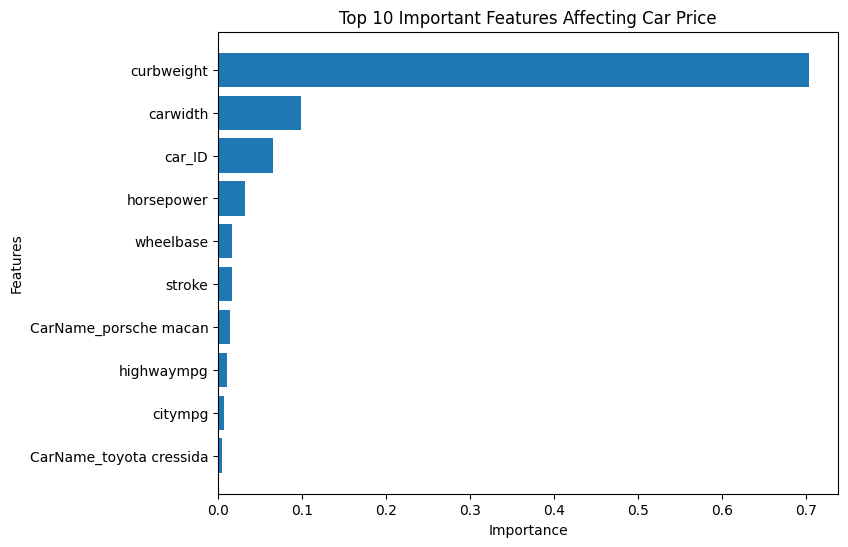

In [34]:
plt.figure(figsize=(8,6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Top 10 Important Features Affecting Car Price")
plt.gca().invert_yaxis()
plt.show()

### Hyperparameter Tuning

In [35]:
param_grid = {
    'max_depth': [3,5,7,10,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': [None, 'sqrt', 'log2']
}

dt = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


#### Evaluate tuned model

In [36]:
y_pred_tuned = best_dt.predict(X_test)

print("Tuned R2:", r2_score(y_test, y_pred_tuned))
print("Tuned MSE:", mean_squared_error(y_test, y_pred_tuned))
print("Tuned MAE:", mean_absolute_error(y_test, y_pred_tuned))

Tuned R2: 0.9032071337149
Tuned MSE: 1627043.1273395463
Tuned MAE: 961.7557503987242


##### Hyperparameter tuning was performed using GridSearchCV to optimize the Decision Tree model. Parameters such as max_depth, min_samples_split, min_samples_leaf, and max_features were tuned using 5-fold cross-validation.After tuning, the model showed a slight decrease in R² and a small increase in error metrics. This indicates that the tuned model is less overfitted and more generalized to unseen data. Although the default model had slightly better test scores, the tuned model is more reliable and robust, which is the main goal of hyperparameter tuning.